In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import pprint
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Fetching Data**
---

In [2]:
def fetchData(linkToFile):
  return pd.read_csv(linkToFile)

In [3]:
dataset = fetchData("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv")

#**A very basic classification, version-2.1**
---

In [4]:
column_names = list(dataset.columns)
print(column_names)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [5]:
# Get unique names of species
class_names = dataset[column_names[4]].unique()

This time, I am going to try to classify using two features. Let's see which two are the best combinations to use to classify.

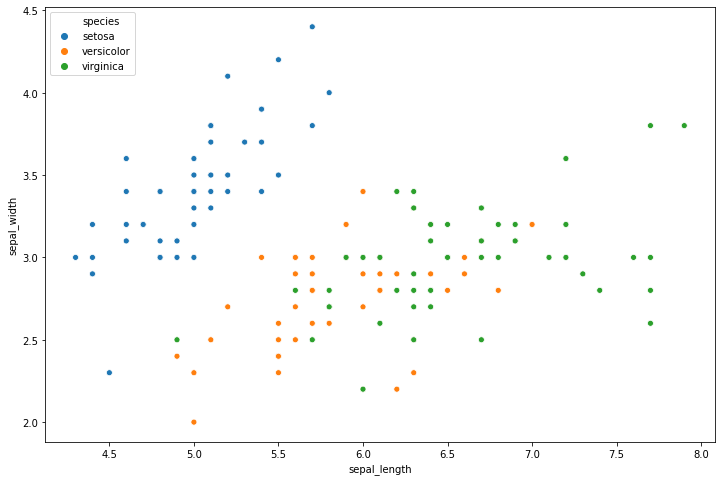

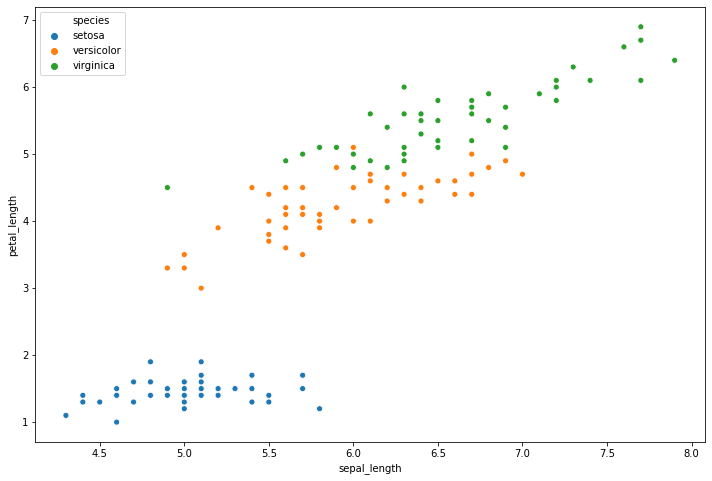

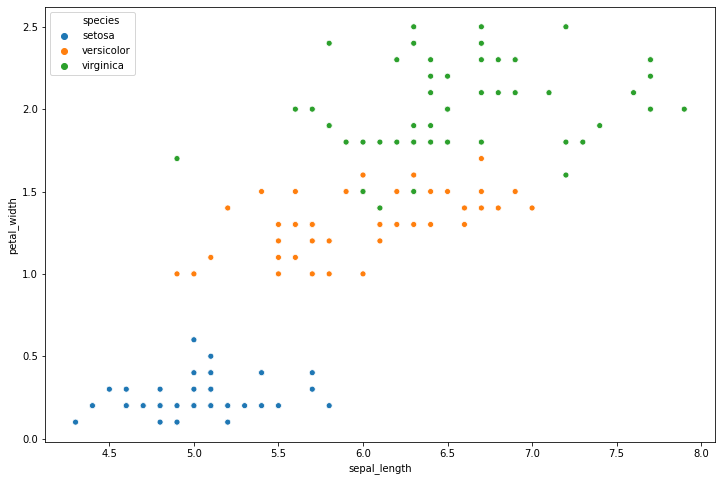

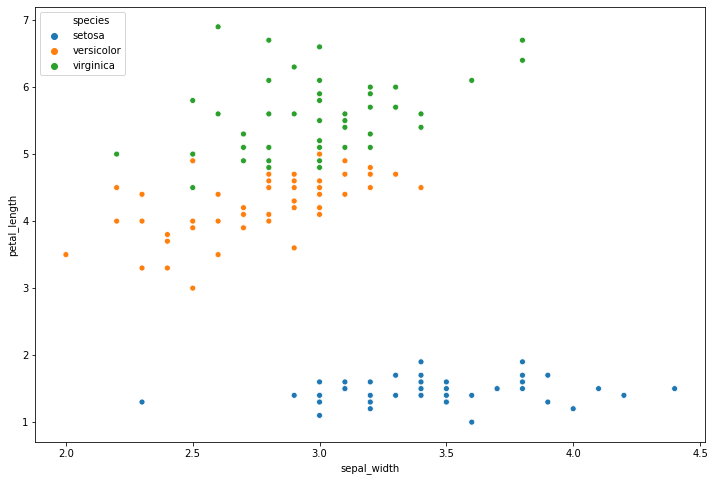

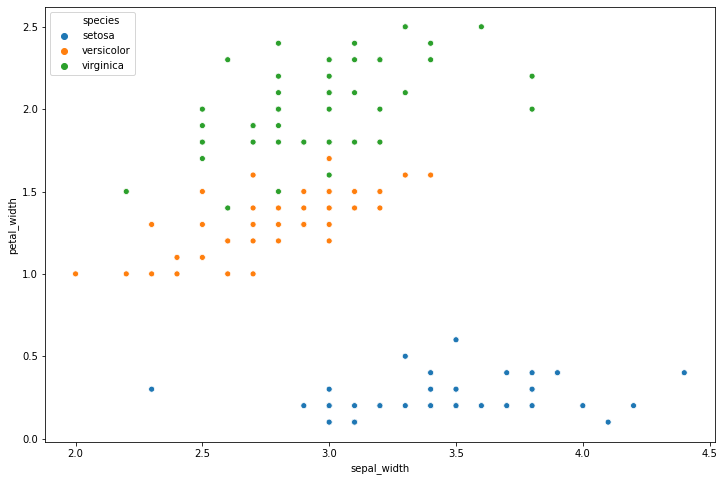

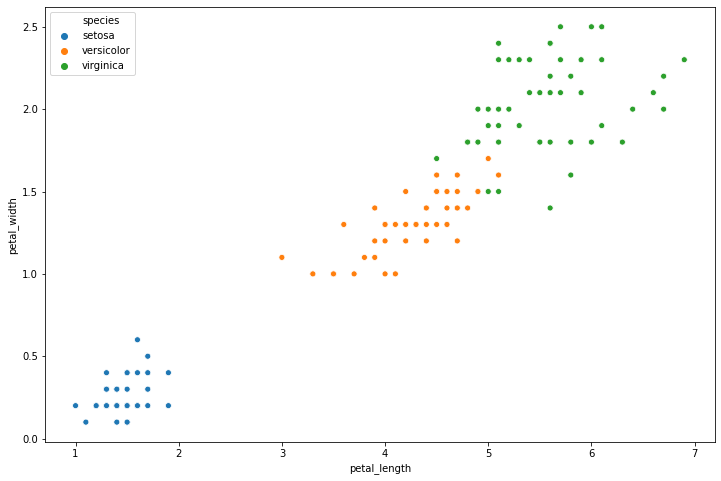

In [6]:
for x_cor_feature_index in range(4):
  for y_cor_feature_index in range(x_cor_feature_index+1, 4):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=column_names[x_cor_feature_index], y=column_names[y_cor_feature_index], data=dataset, hue='species')
    plt.xlabel(column_names[x_cor_feature_index])
    plt.ylabel(column_names[y_cor_feature_index])
    plt.legend(loc='upper left')
    plt.show()

The combination of **sepal_length** and **sepal_width** is a disaster. But the rest of the plots looks promising, although **versicolor** and **verginica** has ovelapped on all plots. This is going to affect on the classification accuracy.

**Let's build our classifier**
---

I am going to need some helper functions to achieve my goal and keeping my code clean.

**Default classifier**\
This will generate a classifier with no valid data to use it for the function that will create the actual classifier.\
The idea behind this is to encapsulate the class region of the plots inside a rectangular area. The four points of each class in the dictionary represents the four points of the rectangle.\
When finding the class for test data, we will see if the data point falls into perticular rectangular area or not.

In [7]:
def create_default_classifier():
  class_gen = {}
  for class_name in class_names:
    class_gen[class_name] = {'lower_left_point':(10,10),
                             'upper_left_point':(10,0),
                             'lower_right_point':(0,10),
                             'upper_right_point':(0,0)
                             }
  return class_gen

In [8]:
def two_feature_classifier(train_data):
  '''
  Input:
  train_data  - a two dimentional numpy array, that contains two features and its corresponding class on each row

  Output:
  class_gen   - a dictionary that contains the ranges of every feature for every class
  '''
  class_gen = create_default_classifier()
  for row in train_data:
    for this_class, class_info in class_gen.items():
      if (row[2] != this_class):
        continue
      if (row[0]<class_info['lower_left_point'][0]) and (row[1]<class_info['lower_left_point'][1]):
        class_info['lower_left_point'] = (row[0],row[1])  #means the rectangle has to be moved further left and down
      elif (row[0]<class_info['upper_left_point'][0]) and (row[1]>class_info['upper_left_point'][1]):
        class_info['upper_left_point'] = (row[0],row[1])  #means the rectangle has to be moved further left and up
      elif (row[0]>class_info['lower_right_point'][0]) and (row[1]<class_info['lower_right_point'][1]):
        class_info['lower_right_point'] = (row[0],row[1]) #means the rectangle has to be moved further right and down
      elif (row[0]>class_info['upper_right_point'][0]) and (row[1]>class_info['upper_right_point'][1]):
        class_info['lower_left_point'] = (row[0],row[1])  #means the rectangle has to be moved further right and up
  return class_gen  #return the rectangle as a dictionary

In [9]:
def predict_class(feature_value, class_gen):
  pass

In [10]:
def calculate_accuraccy(test_data_with_class, class_gen):
  pass

In [11]:
for x_cor_feature_index in range(4):
  for y_cor_feature_index in range(x_cor_feature_index+1, 4):
    print("Showing results for {} and {}\n".format(column_names[x_cor_feature_index], column_names[y_cor_feature_index]))
    numpy_dataset = dataset[[column_names[x_cor_feature_index], column_names[y_cor_feature_index], "species"]].to_numpy()
    
    train_set, validation_set = train_test_split(numpy_dataset, test_size=0.2, random_state=42)
    train_set, test_set = train_test_split(train_set, test_size=0.2, random_state=42)

    class_gen = two_feature_classifier(train_set)
    pprint.pprint(class_gen)
    print("-------------------------------------------------------")

Showing results for sepal_length and sepal_width

{'setosa': {'lower_left_point': (4.9, 3.1),
            'lower_right_point': (5.1, 3.3),
            'upper_left_point': (5.2, 4.1),
            'upper_right_point': (0, 0)},
 'versicolor': {'lower_left_point': (6.6, 2.9),
                'lower_right_point': (6.3, 2.3),
                'upper_left_point': (5.6, 3.0),
                'upper_right_point': (0, 0)},
 'virginica': {'lower_left_point': (7.4, 2.8),
               'lower_right_point': (7.7, 2.8),
               'upper_left_point': (6.2, 3.4),
               'upper_right_point': (0, 0)}}
-------------------------------------------------------
Showing results for sepal_length and petal_length

{'setosa': {'lower_left_point': (4.9, 1.5),
            'lower_right_point': (5.8, 1.2),
            'upper_left_point': (5.1, 1.7),
            'upper_right_point': (0, 0)},
 'versicolor': {'lower_left_point': (6.6, 4.6),
                'lower_right_point': (6.4, 4.3),
                'u

#**Discussion**
---

After doing all this work, I have realised the logic of surrounding the points into a rectanglar area is not possible, not always.\
I need to use a convex hull algorithm to surround all the points nicely in an area.